# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

# Value at risk (VaR)
VaR or Value at risk is defined as the ‘dollar loss’ of a particular market portfolio, which will not be exceeded during a certain period of time, with a certain level of confidence. 

Thus VaR has three components: 
1. A confidence level (90%, 95%, or 99%)
2. A time period (day, month, or year) 
3. An expected loss (dollar value or in percentage)

In this notebook, we will calculate the daily VaR in percentage terms using the non-parametric method that is the historical method.

## Historical method
The historical method works with the actual historical daily returns. The underlying assumption behind this method is that history will repeat itself.

The steps followed to calculate the VaR using the historical method are as follows:
1. Read the price data of the stock into the data frame
2. Calculate the daily returns of the stock 
3. Sort the returns from worst to best
4. The 99th, 95th, and 90th percentile values are the VaR for 99%, 95%, and 90% confidence levels respectively

## Import the libraries


In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting 
import matplotlib.pyplot as plt

# Print tabular data
from tabulate import tabulate 

## Read the data
We import the price data for two years for the Apple Inc. stock.

In [2]:
df = pd.read_csv('../data_modules/AAPL_new.csv')   
df.set_index("Date",inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,107.01,107.03,104.82,105.26,99.03,40635300
2016-01-04,102.61,105.37,102.00,105.35,99.12,67649400
2016-01-05,105.75,105.85,102.41,102.71,96.63,55791000
2016-01-06,100.56,102.37,99.87,100.70,94.74,68457400
2016-01-07,98.68,100.13,96.43,96.45,90.74,81094400


## Compute daily returns
We calculate the daily returns for the stock and then plot the histogram of the daily returns.

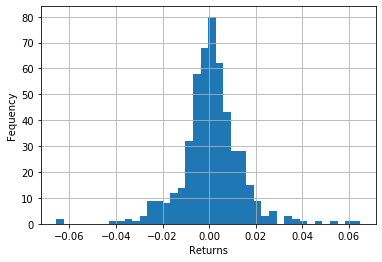

In [3]:
df['returns'] = df.Close.pct_change()
df = df.dropna()
plt.hist(df.returns, bins=40)
plt.xlabel('Returns')
plt.ylabel('Fequency')
plt.grid(True)
plt.show()

The above histogram represents the frequency of daily returns over the two years. At the extreme left, there are tiny bars. This means there are only a few days where the loss is less than -4%. 

## Compute the VaR

We first sort the returns from worst to best and then compute the VaR for 90%, 95%, and 99% confidence levels. Here we will use quantile function to get the VaR for the different confidence levels. 

In [4]:
df.sort_values('returns', inplace= True, ascending = True)

VaR_90= df['returns'].quantile(0.1)
VaR_95= df['returns'].quantile(0.05)
VaR_99= df['returns'].quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0125768
95%                      -0.0206909
99%                      -0.0335154


The daily VaR for the Apple Inc. stock at 90%, 95% and 99% confidence levels are -1.26%, -2.07% and -3.35% respectively.

## Historical method for a portfolio VaR

Similar, to single stock VaR, we can calculate the portfolio VaR using the following steps:
1. Read the price data of all the stocks in a portfolio and store it into a data frame
2. Calculate the daily returns of all the stock in the portfolio
3. Add all the stock returns to compute portfolio returns. Here we have assumed equal allocation to all the stocks in the portfolio
3. Sort the portfolio returns from worst to best
4. The 99th, 95th, and 90th percentile values are the VaR for 99%, 95%, and 90% confidence levels respectively

## Read the portfolio data

We define a portfolio with following stocks namely Google, Tesla, IBM, Apple, Alibaba, Goldman Sachs, and Bank of America.
Then, we read the price data for all the stocks in the portfolio, calculate the portfolio daily returns and plot the histogram of the portfolio daily returns.

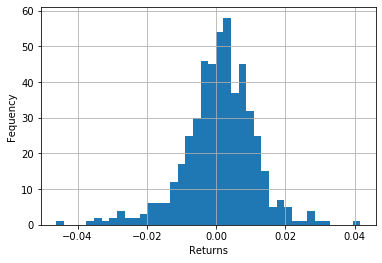

In [5]:
portfolio = pd.read_csv('../data_modules/closeprice.csv')
portfolio.set_index("Date",inplace=True)
portfolio = portfolio.pct_change()
portfolio['returns'] = portfolio.sum(axis=1)/7

portfolio = portfolio.dropna()
plt.hist(portfolio.returns, bins=40)
plt.xlabel('Returns')
plt.ylabel('Fequency')
plt.grid(True)
plt.show()
plt.show()

## Calculate the portfolio VaR
Sort the returns from worst to best and calculate the VaR for 90%, 95%, and 99% confidence levels.

In [6]:
portfolio.sort_values('returns', inplace = True, ascending = True)

VaR_90 = portfolio['returns'].quantile(0.1)
VaR_95 = portfolio['returns'].quantile(0.05)
VaR_99 = portfolio['returns'].quantile(0.01)

print(tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0109315
95%                      -0.0164425
99%                      -0.0296384


The portfolio VaR at 90%, 95% and 99% confidence levels are -1.09%, -1.64% and -2.96% respectively. As seen, the portfolio VaR is less than VaR for Apple Inc. The reason for this is a diversified portfolio helps to reduce the stock specific risk.
In the next unit, there will be an interactive exercise. All the best!
<BR>